Used Car Price Prediction --Random Forest Regressor

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [4]:
#importing the dataset
df = pd.read_csv('/content/cardekho_data.csv')

#EDA

In [5]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [7]:
print("Fuel_Type:",df.Fuel_Type.unique())

Fuel_Type: ['Petrol' 'Diesel' 'CNG']


In [8]:
print("Seller_Type:",df.Seller_Type.unique())

Seller_Type: ['Dealer' 'Individual']


In [9]:
print("Transmission:",df.Transmission.unique())

Transmission: ['Manual' 'Automatic']


In [10]:
print("Owner:",df.Owner.unique())

Owner: [0 1 3]


In [11]:
print(df.describe())

              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


In [12]:
df['Current_year'] =2024
df['No_of_years'] = df['Current_year']-df['Year']

In [13]:
#Drop the columns carName,year,Current_year
df.drop(['Car_Name','Year','Current_year'],axis=1,inplace=True)

In [14]:
df.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'No_of_years'],
      dtype='object')

In [15]:
#Convert data from Categorical form to Numerical form
from sklearn.preprocessing import LabelEncoder
df['Fuel_Type'] = LabelEncoder().fit_transform(df['Fuel_Type'])
df['Seller_Type'] = LabelEncoder().fit_transform(df['Seller_Type'])
df['Transmission'] = LabelEncoder().fit_transform(df['Transmission'])
df['Owner'] = LabelEncoder().fit_transform(df['Owner'])

In [16]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_years
0,3.35,5.59,27000,2,0,1,0,10
1,4.75,9.54,43000,1,0,1,0,11
2,7.25,9.85,6900,2,0,1,0,7
3,2.85,4.15,5200,2,0,1,0,13
4,4.60,6.87,42450,1,0,1,0,10


In [17]:
df['Seller_Type']

,Seller_Type
0,0
1,0
2,0
3,0
4,0
...,...
296,0
297,0
298,0
299,0


In [18]:
df['Owner']

,Owner
0,0
1,0
2,0
3,0
4,0
...,...
296,0
297,0
298,0
299,0


In [19]:
df['Transmission']

,Transmission
0,1
1,1
2,1
3,1
4,1
...,...
296,1
297,1
298,1
299,1


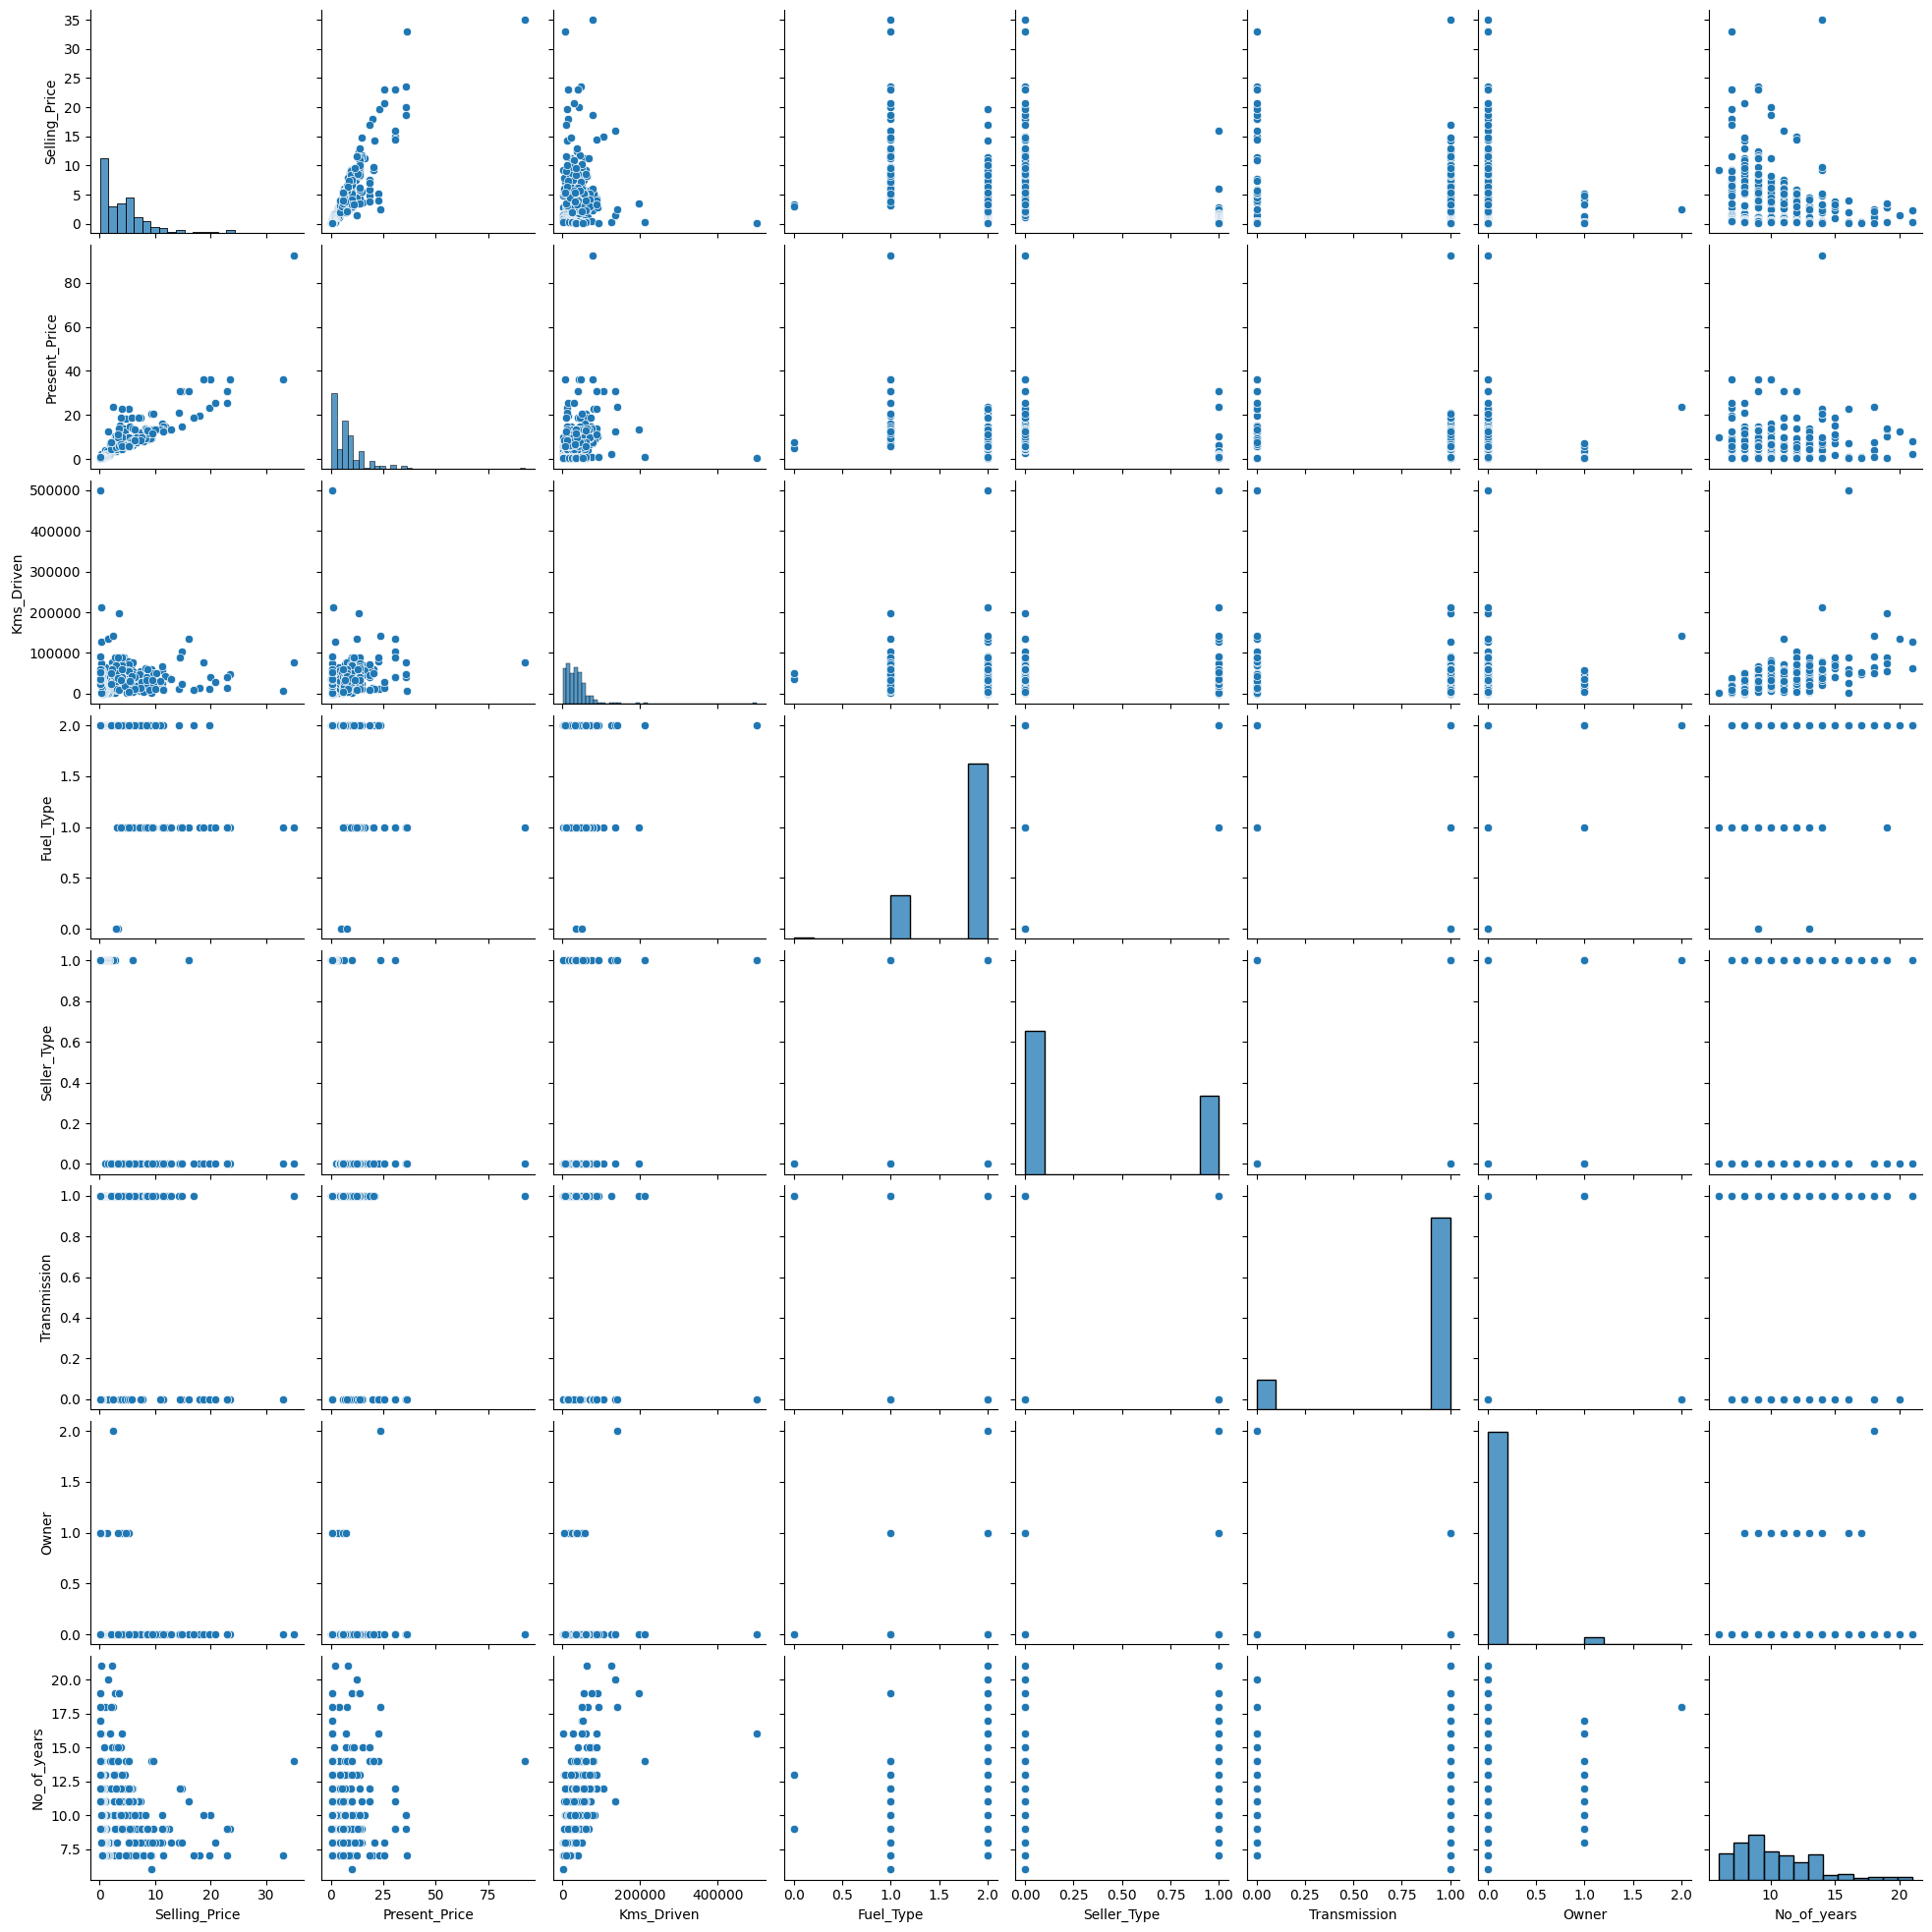

In [20]:
print(sns.pairplot(df))
plt.show()

Axes(0.125,0.11;0.62x0.77)


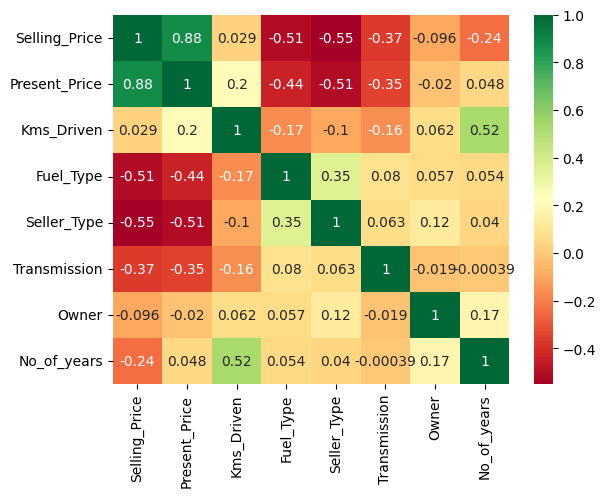

In [21]:
print(sns.heatmap(df.corr(),annot=True,cmap='RdYlGn'))
plt.show()

#Splitting the data

In [22]:
#Splitting the data
X = df.drop('Selling_Price',axis=1)
y = df.Selling_Price

#Feature Selection(Feature Importance)

In [23]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
feat_imp = model.fit(X,y)

In [24]:
feat_imp.feature_importances_

array([4.17644524e-01, 3.89560667e-02, 1.43205363e-01, 2.42248476e-01,
       7.98096305e-02, 2.62089224e-04, 7.78738504e-02])

<Axes: >

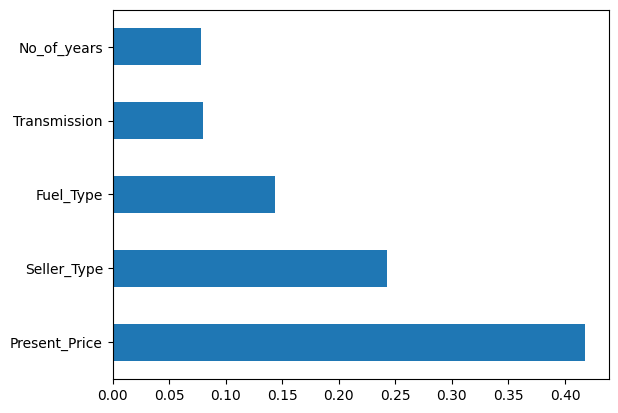

In [25]:
imp = pd.Series(feat_imp.feature_importances_,index = X.columns)
imp.nlargest(5).plot(kind = 'barh')

#Splitting the data



In [26]:
#Splitting the data
X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size=0.2,random_state=0)


#Model selection

In [27]:
#Model selection
regressor =  RandomForestRegressor()

#Hyper parameter Tunning

In [28]:
n_estimators = [int(i) for i in np.linspace(start=100,stop=1200,num=12)]
max_features =['auto','sqrt']
max_depth = [int(i) for i in np.linspace(start=5,stop=30,num=6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]
random_grid = {'n_estimators':n_estimators,
               'max_features':max_features,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf
               }

In [29]:
random_grid

{'n_estimators': [100,
  200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 5, 10, 15, 100],
 'min_samples_leaf': [1, 2, 5, 10]}

In [30]:
from sklearn.model_selection import RandomizedSearchCV
rf_regressor = RandomizedSearchCV(estimator=regressor,param_distributions=random_grid,scoring='neg_mean_squared_error',cv=5,verbose=2,random_state=42,n_jobs=1)

#Training the model

In [31]:
rf_regressor.fit(X_train,y_train)
print(rf_regressor.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   1.3s
[CV] END max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   1.4s
[CV] END max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   1.2s
[CV] END max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=7

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

{'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


In [32]:
y_pred = rf_regressor.predict(X_test)

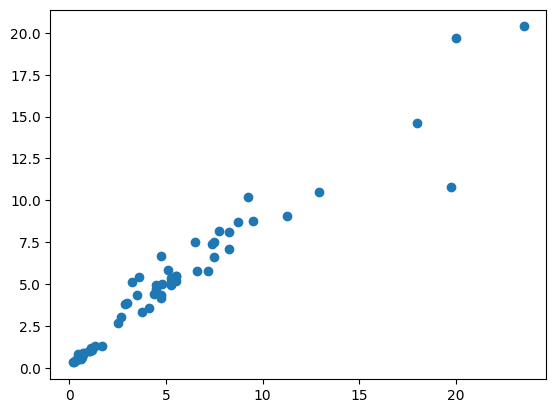

In [33]:
plt.scatter(y_test,y_pred)
plt.show()

In [34]:
finaldf = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
print(finaldf)

     Actual  Predicted
223    8.25   7.074961
150    0.50   0.666753
226    5.25   4.926272
296    9.50   8.796687
52    18.00  14.633006
..      ...        ...
137    0.65   0.625005
227    2.55   2.684225
26     4.15   3.556520
106    1.35   1.310054
92     3.51   4.366989

[61 rows x 2 columns]


<Axes: >

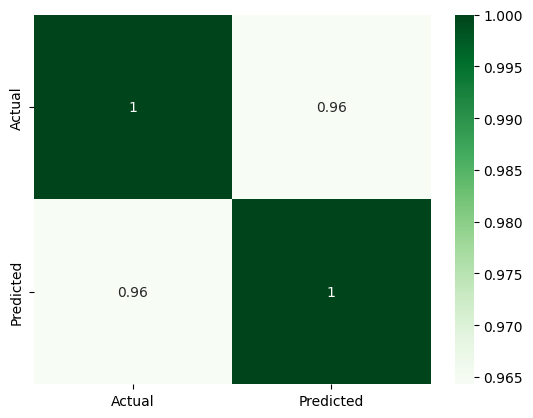

In [35]:
sns.heatmap(finaldf.corr(),annot=True,cmap= 'Greens')

#Performance/Accuracy of the model

In [40]:
r2_score(y_test,y_pred)

0.9126054356616218

In [42]:
import pickle
with open('car_price_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved successfully!")

Model saved successfully!


Conclusion : The Accuracy Score of the Model is increased from 35% (Using Decision Tree Regressor) to 91% (Using Random Forest Regressor).